## Delhi Metro – Data Cleaning & Exploration Python Project

Dataset- https://shorturl.at/DV4X6

### Columns in the dataset

- `TripID`, `Date`, `From_Station`, `To_Station`, `Distance_km`, `Fare`, `Cost_per_passenger`, `Passengers`, `Ticket_Type`, `Remarks`

Note: our dataset contains:
- ~1% missing values in `Passengers` (NaN)
- ~1% 'NA' strings in `Ticket_Type`
- ~1% blank `Remarks` entries
- ~30% `From_Station` values with leading/trailing spaces and inconsistent casing (needs trimming)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load dataset
csv_path = r'Enter the file path here'
df = pd.read_csv("E:\Delhi-Metro-Project\delhi_metro_raw.csv")
df.head()

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\saksh\AppData\Local\Temp\ipykernel_7792\3708892534.py:3: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("E:\Delhi-Metro-Project\delhi_metro_raw.csv")


,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks
0,59771,2022-05-08,Inderlok,Kashmere Gate,12.94,77.99,18.27,13.0,Smart Card,maintenance
1,21363,2023-01-12,Model Town,Dilshad Garden,2.33,35.89,83.71,15.0,Tourist Card,maintenance
2,127325,2023-07-13,Kashmere Gate,Netaji Subhash Place,5.56,64.35,43.70,9.0,Single,off-peak
3,140510,2022-11-10,Chandni Chowk,Hauz Khas,4.02,144.13,14.98,27.0,NaN,maintenance
4,144298,2022-11-06,Rajiv Chowk,Kalkaji Mandir,9.66,104.96,83.84,23.0,Single,off-peak


In [5]:
# Guys Let's Understand the data first
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TripID              150000 non-null  int64  
 1   Date                150000 non-null  object 
 2   From_Station        150000 non-null  object 
 3   To_Station          150000 non-null  object 
 4   Distance_km         150000 non-null  float64
 5   Fare                150000 non-null  float64
 6   Cost_per_passenger  150000 non-null  float64
 7   Passengers          148500 non-null  float64
 8   Ticket_Type         148500 non-null  object 
 9   Remarks             123743 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 11.4+ MB


In [6]:
df["Ticket_Type"]

0           Smart Card
1         Tourist Card
2               Single
3                  NaN
4               Single
              ...     
149995    Tourist Card
149996    Tourist Card
149997      Smart Card
149998          Single
149999          Single
Name: Ticket_Type, Length: 150000, dtype: object

In [7]:
print(df["Ticket_Type"].value_counts())


Ticket_Type
Single          37341
Smart Card      37244
Return          37103
Tourist Card    36812
Name: count, dtype: int64


In [8]:
mask = (df.index < 90000) & (df["Ticket_Type"].astype(str).str.strip().str.lower() == "return")
df.loc[mask, "Ticket_Type"] = "Tourist Card"



In [9]:
print(df["Ticket_Type"].value_counts())

Ticket_Type
Tourist Card    59193
Single          37341
Smart Card      37244
Return          14722
Name: count, dtype: int64


<Axes: xlabel='Ticket_Type', ylabel='count'>

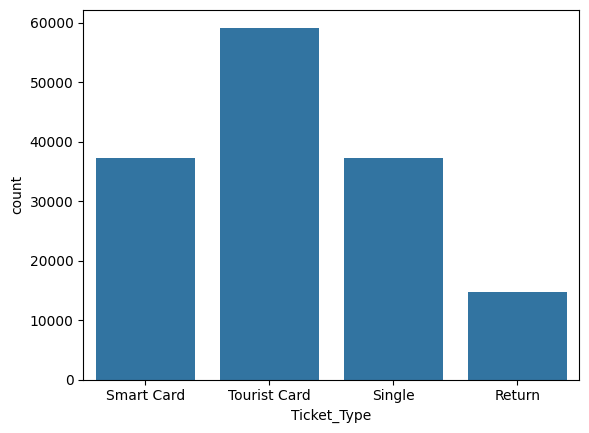

In [10]:
sns.countplot(x="Ticket_Type", data=df)

## Next Step

Lets Undertand Frequency of data in column -"Ticket Type"

| Code Line                         | Meaning                                                         |
| ---------------------------- | --------------------------------------------------------------- |
| `value_counts(dropna=False)` | Bhai, ticket types kitni baar aaye, NA bhi batao!               |
| `== ""`                      | Kitni baar remarks me kuch likhna bhool gaya?                         |
| `isna().sum()`               | Passenger wala column me kitni missing (NaN) hain, batao jaldi! |


In [11]:
# Show counts of special values- kyuki data clean bhi to karna padega tabhi to badhiya charts plot krenge 

print('\nTicket_Type value counts (including NA):')  #heading hai ye thik hai

print(df['Ticket_Type'].value_counts(dropna=False).head())


Ticket_Type value counts (including NA):
Ticket_Type
Tourist Card    59193
Single          37341
Smart Card      37244
Return          14722
NaN              1500
Name: count, dtype: int64


## Next step
ab remarks column mei jo blank values hai use check krte hai , thik hai ?

acha ruko , Passengers column bhi sath mei hi check kr lete hai ?

In [12]:
print('\nRemarks blanks count: ', (df['Remarks']== '').sum())  # bhai isse apne ko blank values kitna hai ye pta chal jayega

print('\nPassengers null count: ', df['Passengers'].isna().sum())  # and bhai isse apne ko NA kitan hai ye pta chal jayega


Remarks blanks count:  0

Passengers null count:  1500


## 1) Trim whitespace and fix casing in `From_Station`

In [13]:
# Trim whitespace and title-case stations
print('Before sample:')
print(df['From_Station'].sample(8))  #chalo random 8 data utha ke check krte hai, iss column mei kya issue hai ?


Before sample:
148960             Hauz Khas
74077      Noida City Centre
1472               Old Delhi
44370         Janakpuri West
16911      Rajouri Garden   
142952        Rajouri Garden
123719                AIIMS 
843             Model Town  
Name: From_Station, dtype: object


## Next step

chalo , isko clean kr dete hai, kyuki hame , "TRIM" , "upercase" ya "lowercase"  krna to ata hi hai , String jab padh rhe the tab bhi to sikha hi tha , hai na ?

In [14]:
df['From_Station'] = df['From_Station'].astype(str).str.strip().str.title()

| Part                 | Meaning                                                                             |
| -------------------- | ----------------------------------------------------------------------------------- |
| `df['From_Station']` | Selecting the column                                                                |
| `astype(str)`        | Convert data to string (in case any value is non-string)                            |
| `str.strip()`        | Remove **leading & trailing whitespace** (e.g. `" Rajiv Chowk "` → `"Rajiv Chowk"`) |
| `str.title()`        | Capitalize **first letter of each word** (e.g. `"rajiv chowk"` → `"Rajiv Chowk"`)   |


Ab to syntax bhi samjh mei aagya ... ? life kitna asan hai na ?  chalo ab wapas check krte hai , data clean hua ya nhi 

## Next step

check krte hai wapas koi bhi random value nikal ke from the same column

In [15]:
print('\nAfter sample:')
print(df['From_Station'].sample(8))


After sample:
36002             Rajiv Chowk
86514             Rajiv Chowk
20847    Netaji Subhash Place
45356           Kashmere Gate
1128             Jasola Vihar
98338                   Aiims
32585                Inderlok
831               Rajiv Chowk
Name: From_Station, dtype: object


## 2) Handle 'NA' strings in `Ticket_Type` and missing entries

| Problem                                            | Example        |
| -------------------------------------------------- | -------------- |
| Dataset has `'NA'` as text, not real missing value | `'NA'` ≠ `NaN` |
| We want real missing values                        | `'NA'` → `NaN` |


In [16]:
# Replace 'NA' string with actual NaN and then inspect
df['Ticket_Type'] = df['Ticket_Type'].replace('NA', np.nan)   # hn ji ham replace kr rhe hai "NA" ->"NAN"

print('Ticket_Type nulls:', df['Ticket_Type'].isna().sum())   # aur bas output check kr rhe hai 



Ticket_Type nulls: 1500


## Next step

ab jab hame , total null values pta chal hi gya hai , so lets replace them 

Par ek min ruko , kya apko pta hai 

Mean -> Average (Sabhi values ko jod kar total number of values se divide karna)

Median -> Middle value (Data ko ascending ya descending order mein sort karne ke baad jo beech ki value hoti hai)

Mode -> Highest Frequency (Wo value jo data mein sabse zyaada baar aati hai)

In [17]:
# Option: fill missing ticket types with 'Unknown' or the mode 
# matlab ye ki apne pass do option hai, ya to null ke jagah pe Unknown likh dete hai, ya phir , jo sabse jyda repeat hua hai wahi likh dete hai

mode_ticket = df['Ticket_Type'].mode(dropna=True)[0]
print('Mode ticket type:', mode_ticket)

# df['Ticket_Type'] = df['Ticket_Type'].fillna(mode_ticket)

Mode ticket type: Tourist Card


## 3) Convert blank `Remarks` to NaN

In [18]:
df['Remarks'] = df['Remarks'].replace('', np.nan)         # ye to simple hai, blank ko "NAN" se replace kr dete hai
print('Remarks nulls after conversion:', df['Remarks'].isna().sum())       #iss line se null ka count pta chal jayega

Remarks nulls after conversion: 26257


## 4) Handle missing `Passengers` values

Options:
- Impute with median or mean
- Drop rows (if only few)


In [19]:
# Example: impute with median passengers
median_pass = int(df['Passengers'].median(skipna=True))
print('Median passengers:', median_pass)

Median passengers: 20


## Next step

ab fill kr dete hai, jo median hamne calculate kiya hai , so we will replace null wiht median valuen now

In [20]:
df['Passengers'] = df['Passengers'].fillna(median_pass)

print('Passengers nulls after replacing:', df['Passengers'].isna().sum())

Passengers nulls after replacing: 0


## 5) Create `Profit` column

Profit per trip = (Fare - Cost_per_passenger) * Passengers

We'll create a `Profit` column and also a `Profit_per_passenger` for analysis.

In [21]:
df['Profit_per_passenger'] = df['Fare'] - df['Cost_per_passenger']
# Profit could be negative for subsidized trips -> keep as is
df['Profit'] = df['Profit_per_passenger'] * df['Passengers']



## Next step - Our first milestone

Lets see hamse kya badhiya kaam kiya hai

In [22]:
#lets print individual column to see it clearly
print(df[['Fare','Cost_per_passenger','Passengers','Profit_per_passenger','Profit']].head())

# lets also check total profit 
print('\nTotal profit across dataset:', df['Profit'].sum())

     Fare  Cost_per_passenger  Passengers  Profit_per_passenger   Profit
0   77.99               18.27        13.0                 59.72   776.36
1   35.89               83.71        15.0                -47.82  -717.30
2   64.35               43.70         9.0                 20.65   185.85
3  144.13               14.98        27.0                129.15  3487.05
4  104.96               83.84        23.0                 21.12   485.76

Total profit across dataset: 127941908.47999999


## 6) Save cleaned dataset (optional)

You can save the cleaned dataframe to a new CSV for further use.

In [23]:
cleaned_path = 'delhi_metro_cleaned_Dataset.csv'
df.to_csv(cleaned_path, index=False)
print('Saved cleaned CSV to', cleaned_path)

Saved cleaned CSV to delhi_metro_cleaned_Dataset.csv


## 7) Now lets Ploting charts to explore the data

Plots included:
1. Bar chart: top 10 stations by number of trips (From_Station)
2. Box plot: Fare distribution
3. Scatter plot: Distance vs Fare
4. Pie chart: Ticket_Type share
5. Histogram: Passengers distribution
6. Line chart: Total daily profit over time


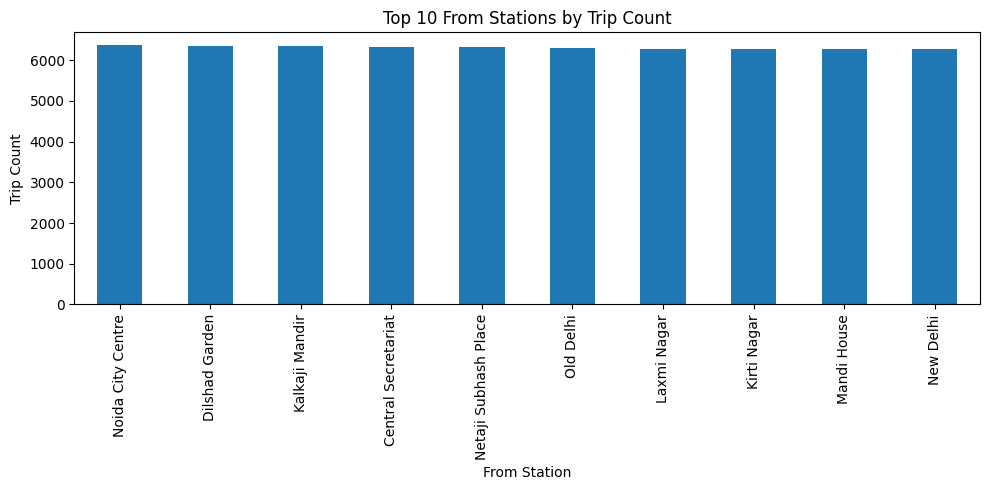

In [24]:
plt.figure(figsize=(10,5))
station_counts = df['From_Station'].value_counts().nlargest(10)
station_counts.plot(kind='bar')
plt.title('Top 10 From Stations by Trip Count')
plt.xlabel('From Station')
plt.ylabel('Trip Count')
plt.tight_layout()
plt.show()

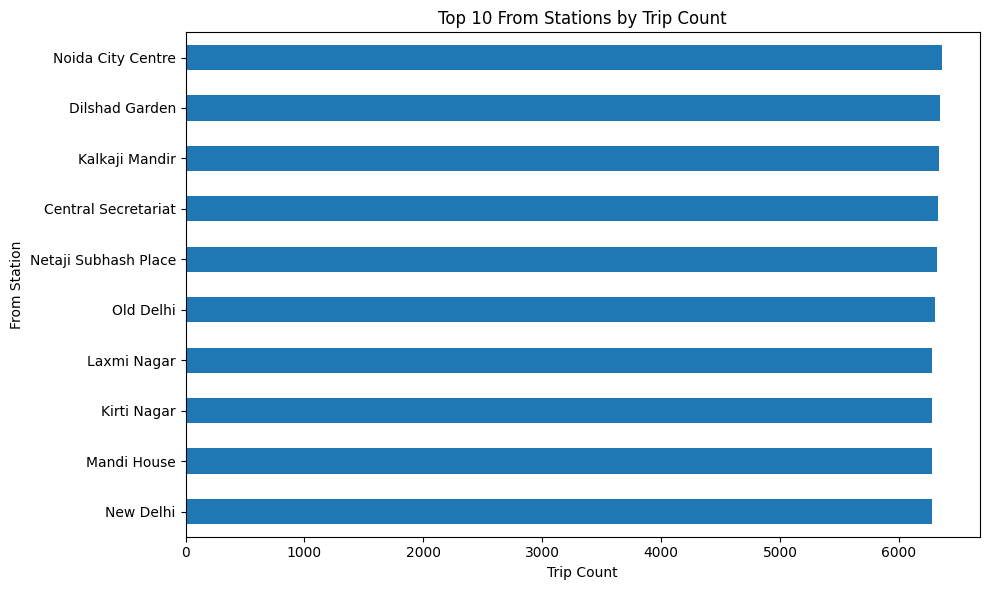

In [25]:
plt.figure(figsize=(10,6))
station_counts = df['From_Station'].value_counts().nlargest(10)

station_counts.plot(kind='barh')
plt.title('Top 10 From Stations by Trip Count')
plt.xlabel('Trip Count')
plt.ylabel('From Station')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [26]:
# Create mask for first 90k rows where From_Station matches either name
mask = (
    (df.index < 90000) &
    (
        df["From_Station"].astype(str).str.strip().str.lower().isin([
            "old delhi",
            "kirti nagar"
        ])
    )
)

# Update those rows
df.loc[mask, "From_Station"] = "Noida City Centre"

In [27]:
print(df["From_Station"].value_counts().head(40))

From_Station
Noida City Centre       13949
Dilshad Garden           6344
Kalkaji Mandir           6338
Central Secretariat      6328
Netaji Subhash Place     6320
Laxmi Nagar              6281
New Delhi                6274
Mandi House              6274
Chandni Chowk            6262
Model Town               6247
Inderlok                 6246
Barakhamba Road          6239
Shivaji Park             6236
Rajouri Garden           6206
Janakpuri West           6205
Aiims                    6199
Kashmere Gate            6197
Rajiv Chowk              6192
Pragati Maidan           6192
Punjabi Bagh             6188
Hauz Khas                6183
Jasola Vihar             6099
Old Delhi                2515
Kirti Nagar              2486
Name: count, dtype: int64


## Total footfall

let calculate

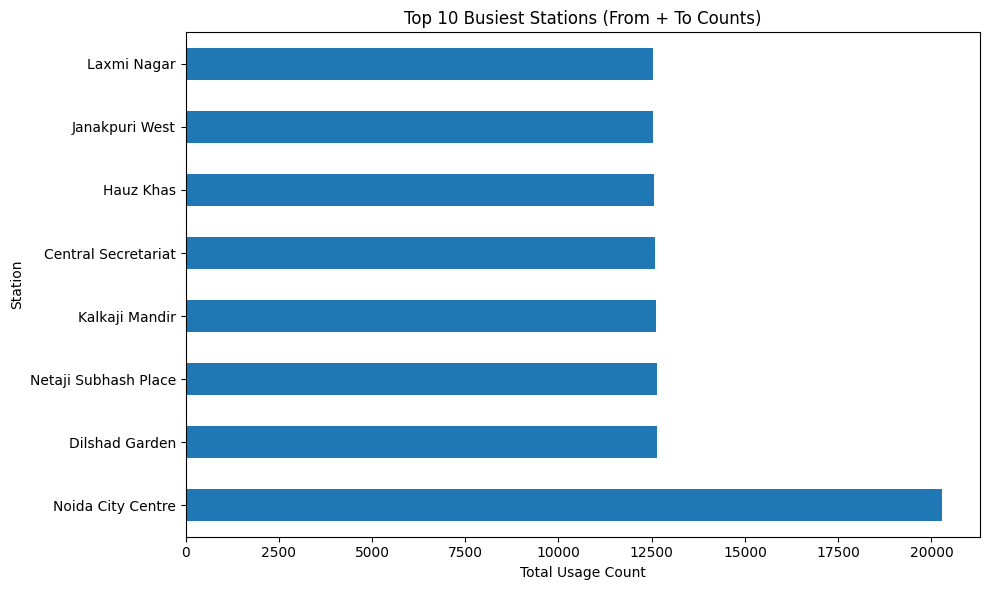

In [28]:
plt.figure(figsize=(10,6))
total_station_counts = (df['From_Station'].value_counts() + df['To_Station'].value_counts()).nlargest(8)

total_station_counts.plot(kind='barh')
plt.title('Top 10 Busiest Stations (From + To Counts)')
plt.xlabel('Total Usage Count')
plt.ylabel('Station')

plt.tight_layout()
plt.show()


### Top 5 From Stations by Trip Count with color gradient

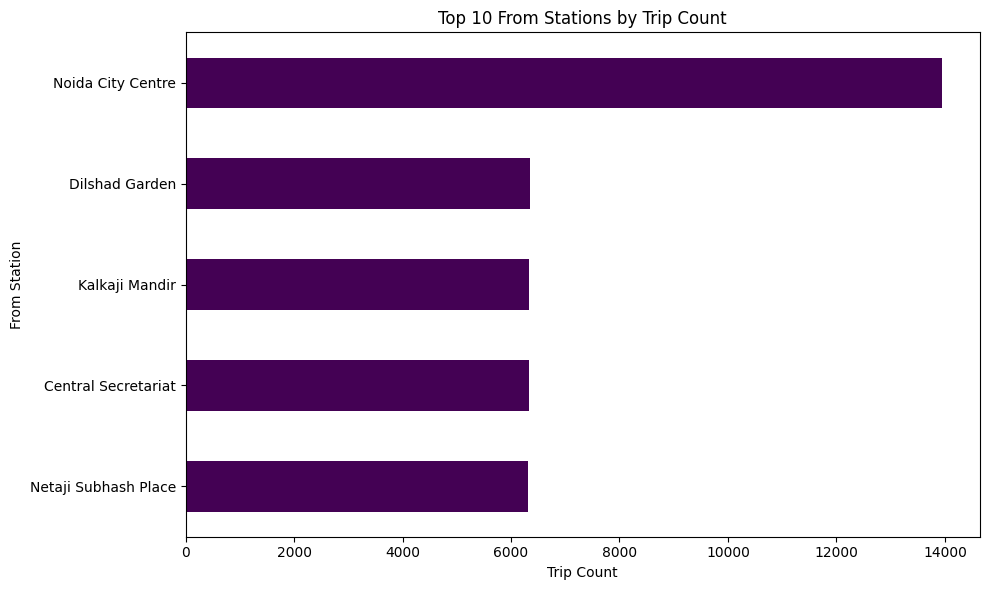

In [29]:
plt.figure(figsize=(10,6))
station_counts = df['From_Station'].value_counts().nlargest(5)

bars = station_counts.plot(kind='barh', cmap='viridis')
plt.title('Top 10 From Stations by Trip Count')
plt.xlabel('Trip Count')
plt.ylabel('From Station')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Top 10 From Stations by % Trip Contribution

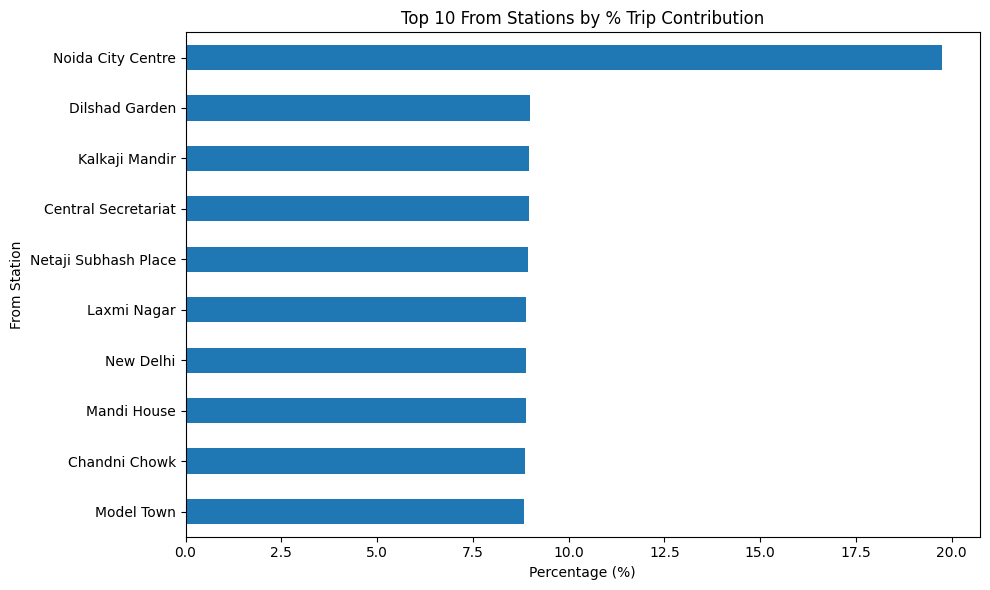

In [30]:
plt.figure(figsize=(10,6))
station_counts = df['From_Station'].value_counts().nlargest(10)
station_pct = (station_counts / station_counts.sum()) * 100

station_pct.plot(kind='barh')
plt.title('Top 10 From Stations by % Trip Contribution')
plt.xlabel('Percentage (%)')
plt.ylabel('From Station')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Plot all the above on a single canvas

C:\Users\saksh\AppData\Local\Temp\ipykernel_7792\3409609318.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=from_counts.values, y=from_counts.index, palette='viridis')


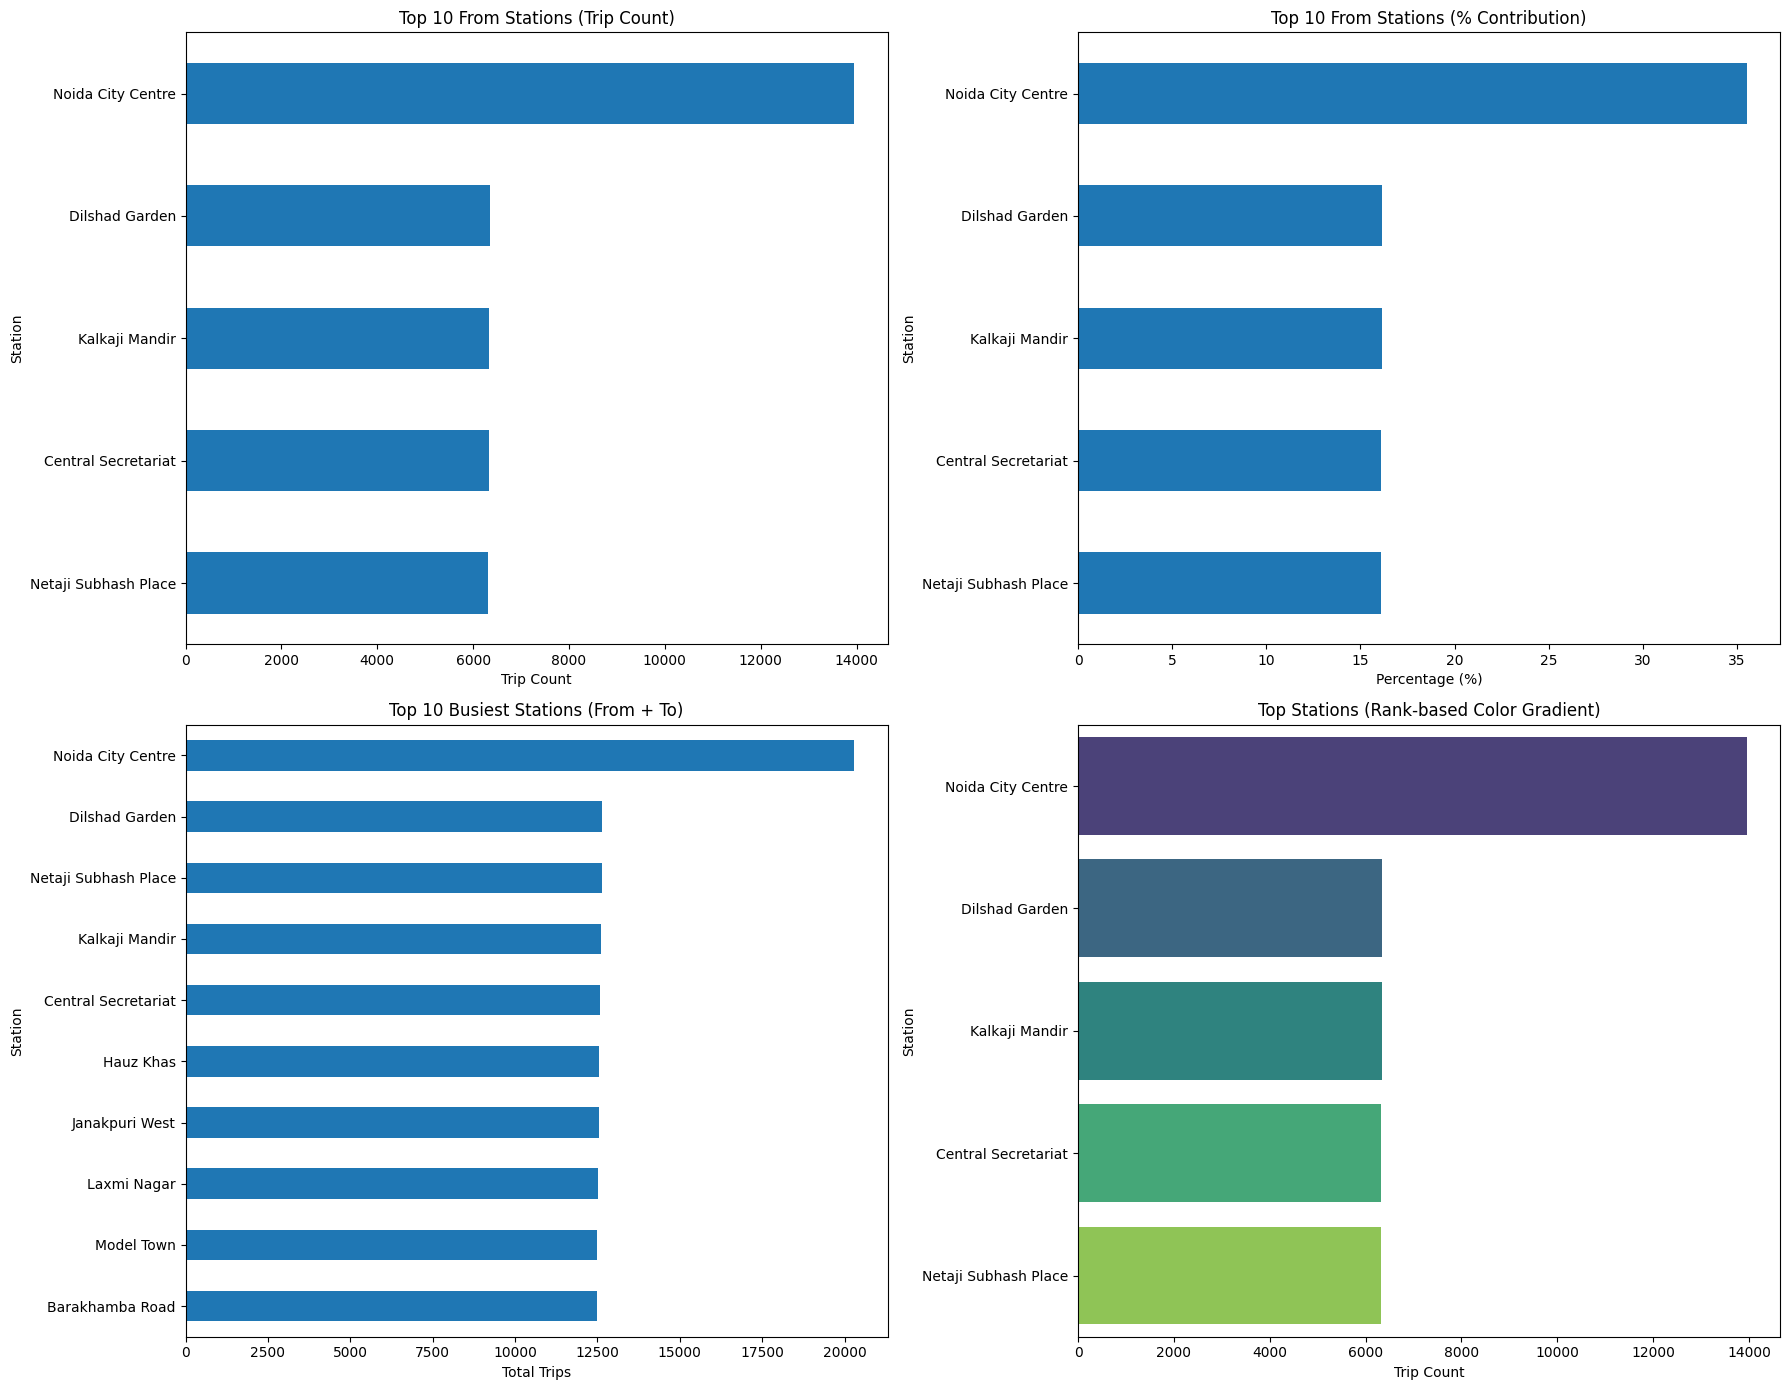

In [31]:
# Prepare data
from_counts = df['From_Station'].value_counts().nlargest(5)
from_pct = (from_counts / from_counts.sum()) * 100
total_counts = (df['From_Station'].value_counts() + df['To_Station'].value_counts()).nlargest(10)

plt.figure(figsize=(18, 14))

# Chart 1: Top 10 From Stations (Count)
plt.subplot(2, 2, 1)
from_counts.plot(kind='barh')
plt.title('Top 10 From Stations (Trip Count)')
plt.xlabel('Trip Count')
plt.ylabel('Station')
plt.gca().invert_yaxis()

# Chart 2: Percentage Contribution
plt.subplot(2, 2, 2)
from_pct.plot(kind='barh')
plt.title('Top 10 From Stations (% Contribution)')
plt.xlabel('Percentage (%)')
plt.ylabel('Station')
plt.gca().invert_yaxis()

# Chart 3: Total Station Usage (From + To)
plt.subplot(2, 2, 3)
total_counts.plot(kind='barh')
plt.title('Top 10 Busiest Stations (From + To)')
plt.xlabel('Total Trips')
plt.ylabel('Station')
plt.gca().invert_yaxis()

# Chart 4: Color Gradient Bar Chart for Ranking
plt.subplot(2, 2, 4)
sns.barplot(x=from_counts.values, y=from_counts.index, palette='viridis')
plt.title('Top Stations (Rank-based Color Gradient)')
plt.xlabel('Trip Count')
plt.ylabel('Station')

plt.tight_layout()
plt.show()


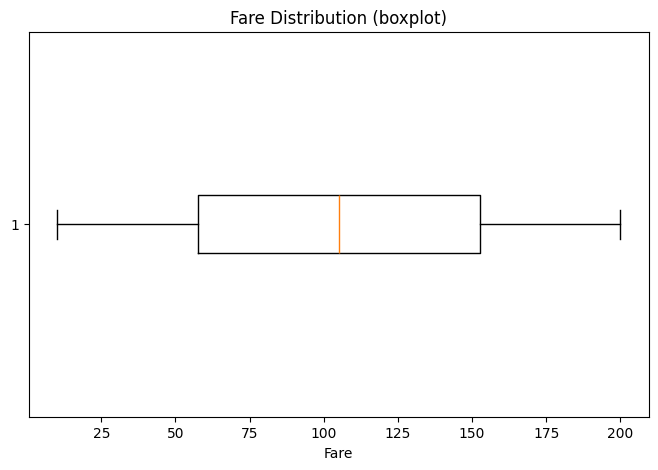

In [32]:
plt.figure(figsize=(8,5))
plt.boxplot(df['Fare'].dropna(), vert=False)
plt.title('Fare Distribution (boxplot)')
plt.xlabel('Fare')
plt.show()

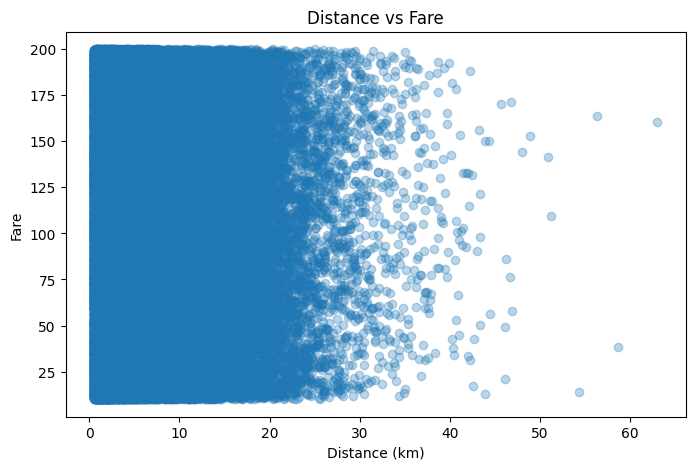

In [33]:
plt.figure(figsize=(8,5))
plt.scatter(df['Distance_km'], df['Fare'], alpha=0.3)
plt.title('Distance vs Fare')
plt.xlabel('Distance (km)')
plt.ylabel('Fare')
plt.show()

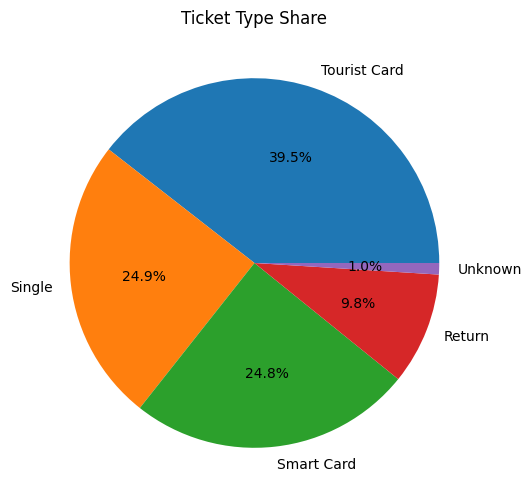

In [34]:
plt.figure(figsize=(6,6))
tt = df['Ticket_Type'].fillna('Unknown').value_counts()
plt.pie(tt, labels=tt.index, autopct='%1.1f%%')
plt.title('Ticket Type Share')
plt.show()

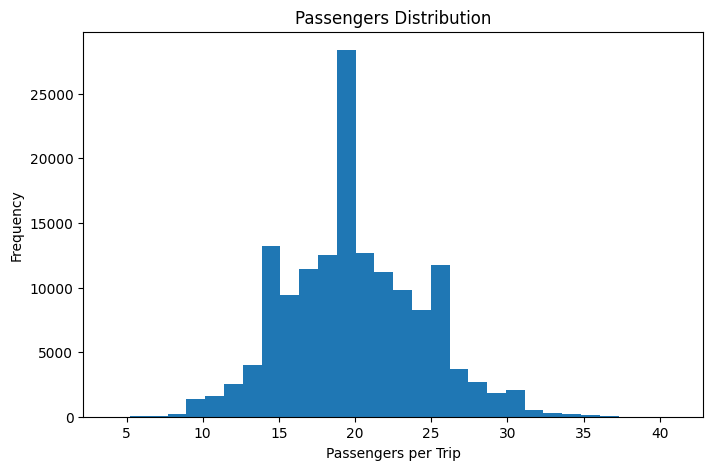

In [35]:
plt.figure(figsize=(8,5))
plt.hist(df['Passengers'], bins=30)
plt.title('Passengers Distribution')
plt.xlabel('Passengers per Trip')
plt.ylabel('Frequency')
plt.show()

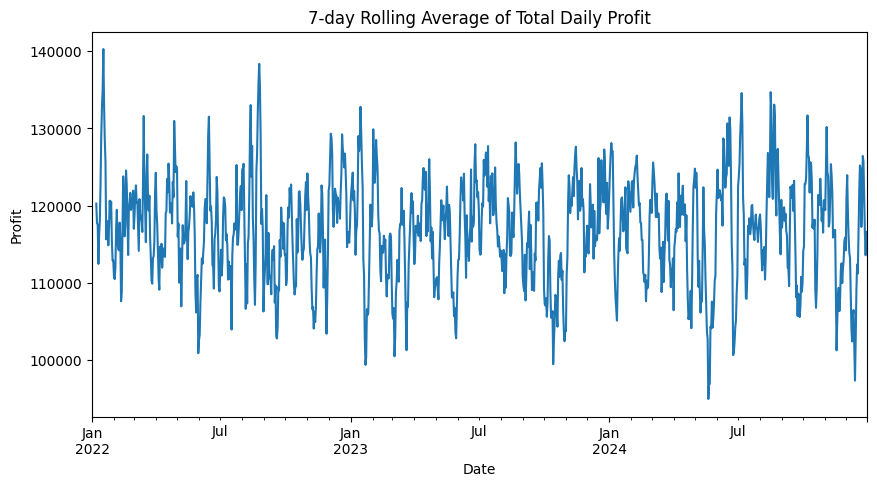

In [36]:
plt.figure(figsize=(10,5))
df['Date'] = pd.to_datetime(df['Date'])
daily = df.groupby('Date')['Profit'].sum().sort_index()
daily.rolling(window=7).mean().plot()
plt.title('7-day Rolling Average of Total Daily Profit')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()

### Final notes

- The dataset is synthetic but realistic enough for practicing cleaning, imputation, trimming, and plotting.
- The notebook provides one example imputation (median). You can experiment with other strategies.
- Profit can be negative for trips where cost > fare, this is realistic for subsidized or low-ridership segments.


Keep practicing and exploring more and more projects
---
